In [50]:
import pandas as pd
import numpy as np
import spacy
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import MultinomialNB

nlp = spacy.load('en_core_web_sm')

X_train_Full = pd.read_csv('GM_raw_ingredients.csv')
X_train_text = list(X_train_Full['text'])

ingred_Full = pd.read_csv('ingredients.csv')
ingred_text = list(ingred_Full['Ingredients'])

#preprocessing validation data
X_vali = pd.read_csv('GM_validation.csv')
X_vali_text = list(X_vali['text'])

test = X_train_text
vali = X_vali_text


dic = {}
ingr = []




In [118]:


ingredients_isolated = []
for rec in range(0,len(test)):
    ingrs = X_train_text[rec].split(":")[2].replace("\r","").replace("\n","")
    ingredients_isolated.append(ingrs)
    

ingredients_isolated[37]

' ["cup sour cream","cup ranch dressing","cup finely chopped sun-dried tomatoes in oil and herbs","slices bacon, crisply cooked and finely chopped","Assorted raw vegetables"],"PrepMethods"'

In [1]:
ingr = []
for para in ingredients_isolated:
    doc = nlp(para)
    val = []
    for token in doc:
        if(token.pos_=="NOUN" and token.is_stop==False and token.text in ingred_text ):
            i = token.text
            val.append(i)
            a = list(set(val))
    #ingr.append(" ".join(a)) 
    ingr.append(a)

#output = pd.DataFrame({'Id':X_vali.Id,'Ingredients':ingr}) #for validation data    

#for training data
output = pd.DataFrame({'Id':X_train_Full.Id,'category':X_train_Full.category,'Ingredients':ingr}) 

output.to_csv('GM.csv',index=False)

In [398]:
output.to_csv('GM_TRNFIN.csv',index=False)




In [81]:
#This cell calculates the top 3/5 ingredients in each category
#Changes were made to the above cell so this wont work unless excel data is in list format

from collections import Counter
from nltk.probability import FreqDist
data = pd.read_csv('GM.csv')
cat =list(data['category'])
ingr_list = list(data['Ingredients'])

snack = []
dessert = []
condiment= []
beverage = []
appetizer = []


for i in range(0,len(cat)):
    if(cat[i]=='snack'):
        snack.extend(ingr[i])
    elif cat[i]=='dessert':
        dessert.extend(ingr[i])
    elif (cat[i]=='condiment'):
        condiment.extend(ingr[i])
    elif (cat[i]=='beverage'):
        beverage.extend(ingr[i])
    elif (cat[i]=='appetizer'):
        appetizer.extend(ingr[i])
    else:
        pass
    
    
snack_dic = FreqDist(appetizer) #Replace the parameters with snack,appetizer
fin_snack = []
for key,value in snack_dic.items():
    fin_snack.append((value,key))
    
sorted(fin_snack[:5],reverse=True)

IndexError: list index out of range

['butter egg chocolate milk peanut',
 'candies oil cake cream',
 'butter pineapple pie cherry cake',
 'butter',
 'salad cider',
 'pomegranate lime',
 'chocolate berries vanilla',
 'chocolate berries vanilla',
 'chocolate berries vanilla',
 'lemon ham salami oregano cheese artichoke bread prosciutto olive',
 'fruit mustard cornmeal',
 'fruit mustard cornmeal',
 'fruit mustard cornmeal',
 'pie vanilla',
 'fruit',
 'lime vodka cranberry',
 'butter',
 'cider onion',
 'butter cream cheese peanut sauce',
 'basil cider pepper olive',
 'basil cider pepper olive',
 'butter',
 'lemon butter cream',
 'fruit',
 'sugar',
 'sugar',
 'pastry cheese cream',
 'lemon lime',
 'tomatoes',
 'bread salad artichoke mayonnaise',
 'cider rice sherry oil',
 'corn butter',
 'corn butter',
 'oil parsley garlic oregano thyme cheese bread baguette olive',
 'oil egg cake vanilla',
 'oil cake vanilla',
 'oil cake vanilla',
 'tomatoes oil bacon',
 'garlic wine chicken',
 'pepper squash butternut',
 'chicken',
 'chocol

In [137]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns 

enco = LabelEncoder()
cv = CountVectorizer()

X_Full = pd.read_csv('GM.csv')
X_test_full = pd.read_excel('GM_test.xlsx')

vali_data = pd.read_csv('GM_vali.csv')
vali_data.dropna(axis=0,subset=['Ingredients'],inplace=True)

y_test = enco.fit_transform(X_Full['category'])

y = enco.transform(X_Full['category'])

#=========================TEst

X_Full = X_Full['Ingredients']

tfid = TfidfVectorizer()
tfid.fit(X_Full)

X = tfid.transform(X_Full)
#==================================

##X_Full.dropna(axis=0,subset=['Ingredients'],inplace=True)

##X_Full.drop(['category'],axis=1,inplace=True)

#X = cv.fit_transform(X_Full['Ingredients'].values)
##X_test = cv.transform(X_test_full['Ingredients'].values)

##preprocessing validation data
#X_vali = cv.transform(vali_data['Ingredients'].values)

X_train,X_valid,y_train,y_valid = train_test_split(X,y,train_size=0.9,test_size=0.1,random_state=0)

nests = [100,150]
cfs = []
for i in nests:
    mod = RandomForestClassifier(n_estimators=i,random_state=0)
    ##mod = RandomForestRegressor(n_estimators=10,max_depth=50,criterion='mae',random_state=0)
    ##mod = MultinomialNB().fit(X_train,y_train)
    mod.fit(X_train,y_train)
    preds = mod.predict(X_valid)
    
    #print("Accuracy: ",mean_absolute_error(y_valid,preds)*100)
    print("Model: ",i)
    print(classification_report(y_valid,preds))
    
    cf = confusion_matrix(y_valid,preds)
    cfs.append(cf)
    #sns.heatmap(cf,annot = True)
#snack = 4
#dessert = 3
#condiment = 5
#beverage = 1
#appetizer = 0






Model:  100
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        14
           1       0.83      0.83      0.83        18
           2       0.78      0.74      0.76        19
           3       0.50      0.75      0.60         8
           4       0.80      0.75      0.77        16

    accuracy                           0.76        75
   macro avg       0.75      0.76      0.75        75
weighted avg       0.78      0.76      0.76        75

Model:  150
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        14
           1       0.79      0.83      0.81        18
           2       0.78      0.74      0.76        19
           3       0.50      0.75      0.60         8
           4       0.79      0.69      0.73        16

    accuracy                           0.75        75
   macro avg       0.74      0.74      0.73        75
weighted avg       0.76      0.75      0.75        75

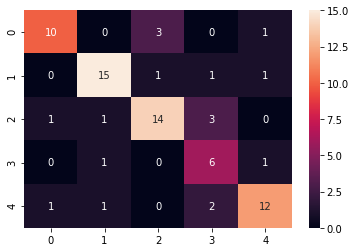

In [138]:
sns.heatmap(cfs[0],annot = True)

In [144]:
encoded = [0,1,2,3,4]
print(encoded)
print(enco.inverse_transform(encoded))

[0, 1, 2, 3, 4]
['appetizer' 'beverage' 'condiment' 'dessert' 'snack']


In [149]:
test = ['oil potato onion cheese','lemon water']

test_trans = tfid.transform(test)
res = mod.predict(test_trans)
print(res)
print("Predicted Classes: ",enco.inverse_transform(res))

[0 1]
Predicted Classes:  ['appetizer' 'beverage']


In [71]:
# #LinearSVC Approach
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_error,classification_report
# from sklearn.preprocessing import LabelEncoder
# from sklearn.ensemble import RandomForestRegressor

# X_Full = pd.read_csv('GM_space_sep.csv')
# X_Full.dropna(axis=0,subset=['Ingredients'])

# X_test = pd.read_csv('GM_space_sep.csv')

# enco = LabelEncoder()

# #y_test = enco.fit_transform(X_Full['category'])

# #X_Full['category'] = enco.transform(X_Full['category'])


# y = X_Full.category


In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [73]:
tfid = TfidfVectorizer(sublinear_tf=True,
                      min_df=5,
                       norm= 'l2',
                      ngram_range=(1,2),
                      stop_words='english')

In [74]:
features = tfid.fit_transform(X_Full.Ingredients).toarray()
features.shape

X_Full.drop(['Id'],axis=1,inplace=True)
X_Full.drop(['category'],axis=1,inplace=True)
X_Full.columns



Index(['Ingredients'], dtype='object')

In [84]:
X_train,X_valid,y_train,y_valid = train_test_split(X_Full,y,train_size=0.8,test_size=0.2,random_state=0)
X_train.head()


,Ingredients
504,"['butter', 'cereal', 'sugar', 'peanut', 'corn']"
97,"['butter', 'caramel']"
737,"['vanilla', 'cereal', 'chocolate', 'candy']"
548,"['raspberries', 'berries', 'raspberry', 'juice..."
511,"['juice', 'lime', 'cheese', 'onion', 'cream', ..."


In [89]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import lightgbm as lgb
cv = CountVectorizer()

X_train_cnts = cv.fit_transform(X_train['Ingredients'])
#X_train_cnts2 = cv.transform(X_train_cnts)
tfid_trans = TfidfTransformer()
X_train_tfid = tfid_trans.fit_transform(X_train_cnts)




#------------------------------------------
#mod = MultinomialNB().fit(X_train_tfid,y_train)
mod  = RandomForestClassifier(n_estimators = 100)
#mod = LinearSVC().fit(X_train_tfid,y_train)
mod.fit(X_train_tfid,y_train)
#pred = mod.predict(cv.transform(X_test['Ingredients']))
pred = mod.predict(tfid_trans.transform(X_test['Ingredients']))
print(classification_report(y,pred))


ValueError: could not convert string to float: 'egg butter milk crust chocolate oil peanut'

In [78]:
# trn = lgb.Dataset(X_train_tfid,y_train)
# param = {'num_leaves':64,'objective':'binary'}
# param['metric'] = 'auc'
# num_round = 1000
# bst = lgb.train(param,trn,num_round,valid_sets=)

TfidfVectorizer()

In [95]:
X_Full.head()
X_Fin = X_Full['Ingredients']

tfid = TfidfVectorizer()
tfid.fit(X_Fin)

X_train_vec = tfid.transform(X_train)
X_test_vec = tfid.transform(X_test)
mod = RandomForestClassifier(n_estimators=100)
mod.fit(X_train_vec,y_train)

ValueError: Found input variables with inconsistent numbers of samples: [1, 596]